In [40]:
 %shell jupyter nbconvert --to html ///content/MNIST_T.ipynb

[NbConvertApp] Converting notebook ///content/MNIST_T.ipynb to html
[NbConvertApp] Writing 686903 bytes to /content/MNIST_T.html


In [41]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please make sure you have enabled GPU acceleration in the notebook settings.")


No GPU found. Please make sure you have enabled GPU acceleration in the notebook settings.


In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# Data

In [42]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

In [43]:
x_train, x_test= x_train/255.0, x_test/255.0

In [15]:
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [16]:
x_train[0].shape

(28, 28)

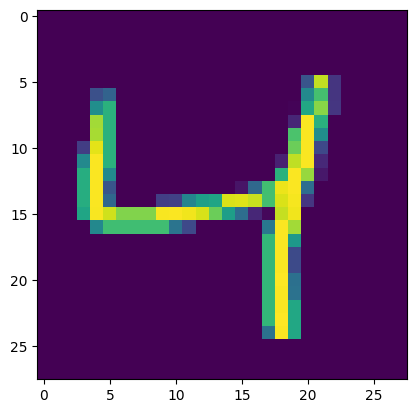

In [17]:
plt.imshow(x_train[2])

In [18]:
num_classes = len(set(y_train))
num_classes

10

In [19]:
num_classes = len(np.unique(y_train))
num_classes

10

#Model

For the model, I create an arbritrary deep model with several `Conv2D` and `MaxPooling2D` layers as well as `Dropout` layers

In [20]:
model= keras.models.Sequential([

    keras.layers.Conv2D(50, kernel_size=(3, 3), activation="relu",
                        padding="same", kernel_initializer= "he_normal",kernel_regularizer=l2(0.01),input_shape=[28,28,1]), # grayscale images; stride by defaul=1
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(100, 3,activation="relu", padding="same",kernel_initializer= "he_normal",kernel_regularizer=l2(0.01)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(50,3,activation="relu",padding="same",kernel_initializer= "he_normal",kernel_regularizer=l2(0.01)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu",kernel_initializer= "he_normal",kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50,activation="relu",kernel_initializer= "he_normal",kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation="softmax"),

])

#compile model

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

#train(fit) model

In [23]:
history=model.fit(x_train,y_train,epochs=15,validation_split=0.15)

Epoch 1/15
1594/1594 [==============================] - 154s 96ms/step - loss: 1.1832 - accuracy: 0.9015 - val_loss: 0.5030 - val_accuracy: 0.9686
Epoch 2/15
1594/1594 [==============================] - 148s 93ms/step - loss: 0.5887 - accuracy: 0.9359 - val_loss: 0.4317 - val_accuracy: 0.9678
Epoch 3/15
1594/1594 [==============================] - 148s 93ms/step - loss: 0.5333 - accuracy: 0.9402 - val_loss: 0.4164 - val_accuracy: 0.9646
Epoch 4/15
1594/1594 [==============================] - 143s 90ms/step - loss: 0.4999 - accuracy: 0.9442 - val_loss: 0.3722 - val_accuracy: 0.9731
Epoch 5/15
1594/1594 [==============================] - 147s 92ms/step - loss: 0.4753 - accuracy: 0.9458 - val_loss: 0.3581 - val_accuracy: 0.9757
Epoch 6/15
1594/1594 [==============================] - 150s 94ms/step - loss: 0.4626 - accuracy: 0.9483 - val_loss: 0.3517 - val_accuracy: 0.9727
Epoch 7/15
1594/1594 [==============================] - 149s 94ms/step - loss: 0.4506 - accuracy: 0.9489 - val_loss: 0

In [24]:
print(history.history)

{'loss': [1.1831835508346558, 0.5886949896812439, 0.5333249568939209, 0.4998887777328491, 0.47531718015670776, 0.4626152813434601, 0.45060884952545166, 0.44007253646850586, 0.43000471591949463, 0.4248494505882263, 0.41450634598731995, 0.40870776772499084, 0.4053203761577606, 0.39576956629753113, 0.395870178937912], 'accuracy': [0.9015098214149475, 0.9359215497970581, 0.940156877040863, 0.9441764950752258, 0.9458431601524353, 0.9483137130737305, 0.9488823413848877, 0.9499411582946777, 0.9517843127250671, 0.9517058730125427, 0.9531176686286926, 0.9530980587005615, 0.9533921480178833, 0.9555882215499878, 0.9551176428794861], 'val_loss': [0.5030266642570496, 0.4316800534725189, 0.41640254855155945, 0.3722226917743683, 0.35805702209472656, 0.3517487347126007, 0.349468857049942, 0.33373522758483887, 0.3328009843826294, 0.3240131437778473, 0.32600101828575134, 0.31959614157676697, 0.3124983310699463, 0.31900644302368164, 0.3067024052143097], 'val_accuracy': [0.9685555696487427, 0.967777788639

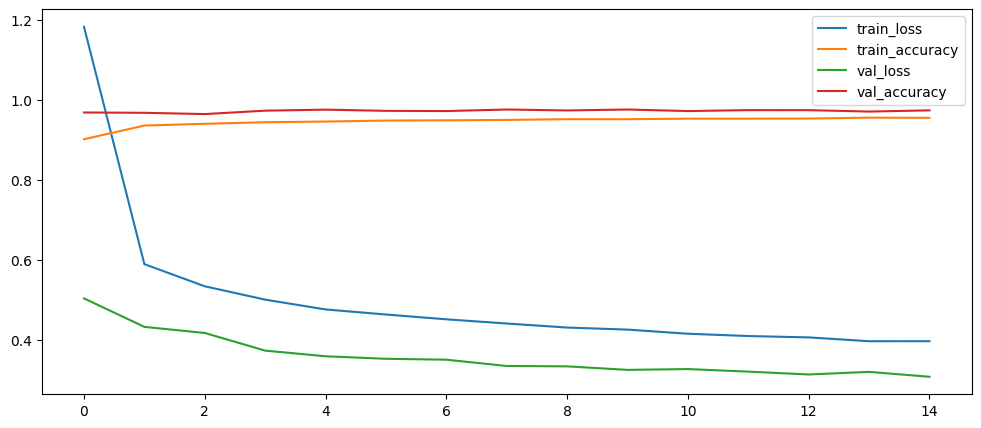

In [25]:
fig, ax =  plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"],label="train_loss")
ax.plot(history.history["accuracy"],label="train_accuracy")
ax.plot(history.history["val_loss"],label = "val_loss")
ax.plot(history.history["val_accuracy"],label = 'val_accuracy')
ax.legend()

#evaluate the performance of the trained model on a test dataset

In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 24ms/step - loss: 0.2963 - accuracy: 0.9788


[0.2963279187679291, 0.9787999987602234]

#prediction

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x1=x_test[0]
x1.shape

(28, 28)

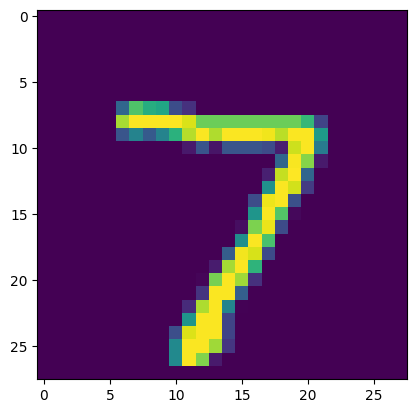

In [29]:
plt.imshow(x1)

In [30]:
x1 = x1.reshape((1, 28, 28, 1))  # Assuming  model expects input shape (batch_size, height, width, channels)
prediction = model.predict(x1)

1/1 [==============================] - 0s 127ms/step


In [31]:
print(prediction)

[[4.54486508e-06 1.08745071e-05 1.05561245e-04 2.14006905e-05
  5.70805651e-06 1.88473484e-06 9.81418391e-10 9.99556839e-01
  6.57094733e-06 2.86562630e-04]]


In [32]:
predicted_class = np.argmax(prediction)
print(predicted_class)

7


I evaluate now with another test data

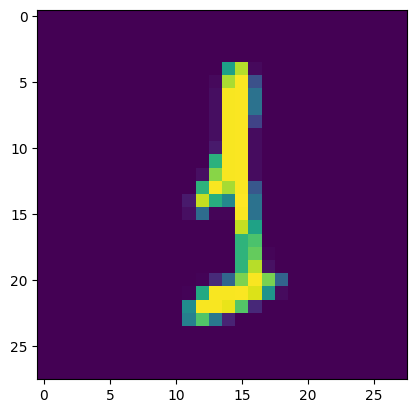

In [33]:
x2=x_test[900]
plt.imshow(x2)

In [34]:
x2=x2.reshape((1, 28, 28, 1))
prediction = model.predict(x2)
print(prediction)

1/1 [==============================] - 0s 24ms/step
[[9.7222604e-05 9.9467260e-01 9.9065527e-04 7.0060650e-04 1.5521563e-03
  3.0138023e-04 3.5164729e-04 3.5374952e-04 8.9167181e-04 8.8318207e-05]]


In [35]:
predicted_class = np.argmax(prediction)
print(predicted_class)

1
